1. Import Libraries and Configure Logging

In [2]:
# Import necessary libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import joblib
import datetime
sys.path.append(os.path.abspath('../scripts'))
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')

2: Import the SalesPrediction Class

In [3]:
# Import the SalesPrediction class from prediction.py
from prediction import SalesPrediction

3: Define File Paths

In [5]:
# Define file paths
train_path = '../src/Data/cleaned_train.csv'
test_path = '../src/Data/cleaned_test.csv'

4: Create an Instance of the SalesPrediction Class

In [6]:
# Create an instance of the SalesPrediction class
sales_prediction = SalesPrediction(train_path, test_path)

5: Load the Data

In [7]:
# Load the data
sales_prediction.load_data()

2025-01-14 20:30:13,801 - Data loaded successfully.


6: Fill NaN Values

In [8]:
# Fill missing values
sales_prediction.train = sales_prediction.fill_na_values(sales_prediction.train)
sales_prediction.test = sales_prediction.fill_na_values(sales_prediction.test)

e:\OnlineClass\AIM\Pharma-Sales-Modeling-and-Forecasting\scripts\prediction.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['StateHoliday'].fillna(0, inplace=True)
e:\OnlineClass\AIM\Pharma-Sales-Modeling-and-Forecasting\scripts\prediction.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

7: Extract Date Features

In [9]:
# Extract date features
sales_prediction.train = sales_prediction.extract_date_features(sales_prediction.train)
sales_prediction.test = sales_prediction.extract_date_features(sales_prediction.test)

2025-01-14 20:30:31,763 - Additional features extracted successfully.
2025-01-14 20:30:31,874 - Additional features extracted successfully.


8: Calculate Holiday Features

In [10]:
# Calculate holiday features
sales_prediction.holidays = pd.to_datetime(sales_prediction.train[sales_prediction.train['StateHoliday'] != 0]['Date'].unique())
sales_prediction.train = sales_prediction.calculate_holiday_features(sales_prediction.train)
sales_prediction.test = sales_prediction.calculate_holiday_features(sales_prediction.test)

e:\OnlineClass\AIM\Pharma-Sales-Modeling-and-Forecasting\scripts\prediction.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Days_To_Next_Holiday'].fillna(0, inplace=True)
2025-01-14 21:00:58,401 - Holiday features calculated successfully.
e:\OnlineClass\AIM\Pharma-Sales-Modeling-and-Forecasting\scripts\prediction.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never 

9: Encode Categorical Features

In [11]:
# Encode categorical features
sales_prediction.train = sales_prediction.encode_features(sales_prediction.train)
sales_prediction.test = sales_prediction.encode_features(sales_prediction.test)

2025-01-14 21:02:41,384 - Features encoded successfully.
2025-01-14 21:02:41,578 - Features encoded successfully.


10: Scale Numeric Features

In [12]:
# Scale numeric features
train_scaled, test_scaled = sales_prediction.scale_data(sales_prediction.train, sales_prediction.test)

2025-01-14 21:02:47,316 - Data scaled successfully.


11: Save the Scaled Data

In [13]:
# Save the scaled data
sales_prediction.save_data(train_scaled, test_scaled)

2025-01-14 21:04:49,224 - Data scaled and saved successfully.


12: Model, Feature Importances, Confidence Interval, and Save the Model

2025-01-11 23:40:54,242 - INFO - Mean Squared Error: 192320.2472186682
2025-01-11 23:40:59,272 - INFO - Mean Absolute Error: 261.65514549601363
2025-01-11 23:40:59,394 - INFO - R-squared: 0.9869955441279313


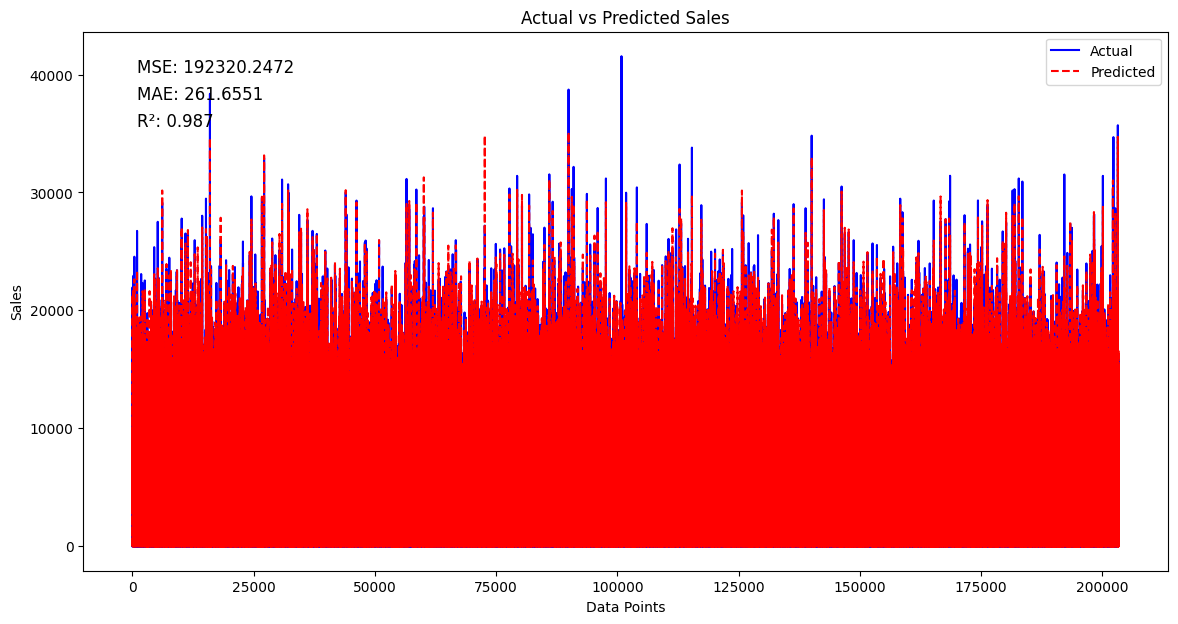

2025-01-11 23:41:21,304 - INFO - Results plotted successfully.


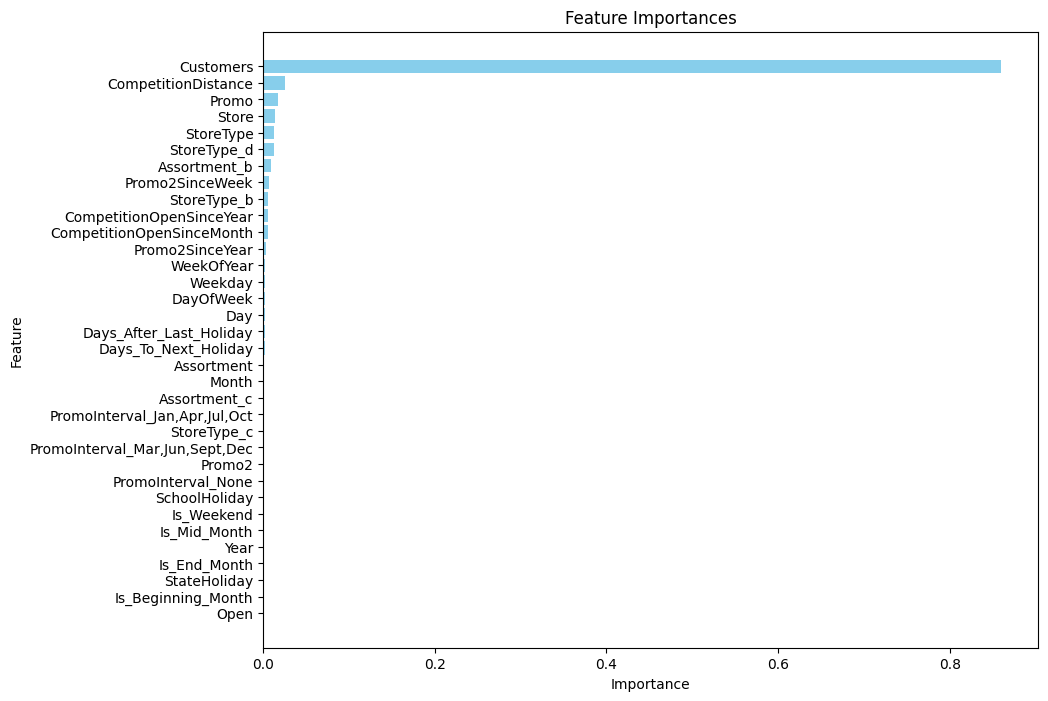

2025-01-11 23:51:24,131 - INFO - Feature importances plotted successfully.
2025-01-11 23:51:32,996 - INFO - 95% Confidence Interval: [5747.701692820313, 5779.136294064155]
2025-01-11 23:51:33,315 - ERROR - Error saving model: [Errno 2] No such file or directory: '../src/Models/model_2025-01-11-23-51-33.pkl'


In [28]:
# Train the model
sales_prediction.train_model()

In [18]:
# # Save the model
sales_prediction.save_model()